In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
url="https://admeter.usatoday.com/2019/02/04/the-top-5-super-bowl-liii-ads-according-to-ad-meter/"

In [4]:
r=requests.get(url).text

In [5]:
soup=BeautifulSoup(r,"html.parser")

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="no-js ie-browser lt-ie9"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="no-js ie-browser ie9"> <![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <script>
   (function(H){H.className=H.className.replace(/\bno-js\b/,'js')})(document.documentElement)
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://admeter.usatoday.com/xmlrpc.php" rel="pingback"/>
  <!--[if lt IE 9]>
    <script src="https://s2.wp.com/wp-content/themes/vip/usatoday-lawrence/js/lib/html5.js" type="text/javascript"></script>
	<link rel="stylesheet" type="text/css" href="https://s2.wp.com/wp-content/themes/vip/usatoday-lawrence/ie8.css">
	<![endif]-->
  <!--[if gte IE 9]>
	<link rel="stylesheet" type="text/css" href="https://s2.wp

In [7]:
table_col1=soup.find('div',{'id':'content-container'})

In [8]:
table_col1

<div id="content-container">
<div class="entry-content normal-format">
<div class="articleBody" itemprop="articleBody"><p>The 31st USA TODAY Ad Meter competition is in the books. It was another great year for Super Bowl commercials, which ranged from humorous to poignant to surreal. Here are the top five spots. A reminder: Panelists rated each ad on a 1-10 scale; the one with the highest average rating wins.</p>
<h3>1. NFL, “The 100-Year Game,” 7.69</h3>
<form action="//wpcomwidgets.com/?wpcom_origin=https%3A%2F%2Fusatadmeter.wordpress.com" id="wpcom-iframe-form-5a96acba07b4600b6f4a3779a105b9e4-5ed10f49d4c4c" method="post" style="display: none" target="wpcom-iframe-5a96acba07b4600b6f4a3779a105b9e4-5ed10f49d4c4c">
<input name="width" type="hidden" value="540">
<input name="height" type="hidden" value="350">
<input name="frameborder" type="hidden" value="0"/>
<input name="style" type="hidden" value=""/>
<input name="class" type="hidden" value=""/>
<input name="scrolling" type="hidden" va

In [9]:
for row in table_col1('span'):
    print(row)
    row.decompose()

<span>Share This</span>
<span class="icomoon icon-facebook"></span>
<span class="share-text">share</span>
<span class="icomoon icon-twitter"></span>
<span class="share-text">tweet</span>
<span class="icomoon icon-whatsapp"></span>
<span class="share-text">send</span>
<span class="icomoon icon-chat"></span>
<span class="share-text">sms</span>
<span class="icomoon icon-email"></span>
<span class="share-text">email</span>
<span>News</span>


In [10]:
table_col1_new=table_col1.find_all('h3')

In [11]:
table_col1_new

[<h3>1. NFL, “The 100-Year Game,” 7.69</h3>,
 <h3>2. Amazon Alexa, “Not Everything Makes the Cut,” 7.34</h3>,
 <h3>3. Microsoft, “We All Win,” 7.07</h3>,
 <h3>4. Hyundai, “The Elevator,” 7.05</h3>,
 <h3>5. Verizon, “The Coach Who Wouldn’t Be Here,” 6.95</h3>]

In [12]:
table_col2=table_col1.find_all('p',attrs={'class':None})

In [13]:
table_col2=table_col2[1:]

In [14]:
for y in table_col2:
    print(y.text)
    print("\n")

The NFL’s epic two-minute long ad, celebrating the league’s upcoming 100th anniversary, features a who’s who of current and former football stars playing an impromptu pickup game during a black-tie gala. There’s Barry Sanders, Deion Sanders, Tom Brady, Franco Harris, “Mean” Joe Greene, the Manning brothers, Marshawn Lynch, Patrick Mahomes, Sam Gordon of the Utah Girls Tackle Football League, and many, many more.


Amazon followed up its 2018 Ad Meter-winning commercial with another celebrity-filled spot, which starred Harrison Ford, Forest Whitaker, Abbi Jacobson, and Ilana Glazer. This year’s ad went through a series of uses for Alexa that just didn’t work.


Microsoft’s touching Super Bowl ad features young gamers with limited mobility. In the commercial, they try out the new Xbox Adaptive Controller.


Jason Bateman stars in Hyundai’s ad as an elevator operator who brings his passengers to life’s most uncomfortable experiences, like for example, a dentist’s office for a root canal. 

In [15]:
import pandas as pd
df=pd.DataFrame(columns=['Ad','Score','Description'])

In [16]:
for x in table_col1_new:
    item1 = x.text[:-4]
    df=df.append({'Ad':item1},ignore_index=True)

In [17]:
n=0
for x in table_col1_new:
    item2 = x.text[-4:]
    df['Score'].iloc[n]=item2
    n+=1

In [18]:
df

,Ad,Score,Description
0,"1. NFL, “The 100-Year Game,”",7.69,NaN
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,NaN
2,"3. Microsoft, “We All Win,”",7.07,NaN
3,"4. Hyundai, “The Elevator,”",7.05,NaN
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,NaN


In [19]:
n=0
for y in table_col2:
    item2 = y.text
    df['Description'].iloc[n]=item2
    n+=1

In [20]:
df

,Ad,Score,Description
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ..."


In [21]:
import contractions
df['no_contract']=df['Description'].apply(lambda x:[contractions.fix(word) for word in x.split()])

In [22]:
df

,Ad,Score,Description,no_contract
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer..."


In [23]:
df['description_a_contract'] = [' '.join(map(str,l)) for l in df['no_contract']]

In [24]:
df

,Ad,Score,Description,no_contract,description_a_contract
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ..."


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/minyoung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.tokenize import word_tokenize

df['tokenized'] = df['description_a_contract'].apply(word_tokenize)

In [27]:
df

,Ad,Score,Description,no_contract,description_a_contract,tokenized
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating...","[The, NFL, ’, s, epic, two-minute, long, ad, ,..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...,"[Microsoft, ’, s, touching, Super, Bowl, ad, f..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai, ’, s, ad,..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon, ’, s, emotional, Super, Bowl, co..."


In [28]:
df['lower'] = df['tokenized'].apply(lambda x:[word.lower() for word in x])

In [29]:
df

,Ad,Score,Description,no_contract,description_a_contract,tokenized,lower
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating...","[The, NFL, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, ’, s, epic, two-minute, long, ad, ,..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...,"[Microsoft, ’, s, touching, Super, Bowl, ad, f...","[microsoft, ’, s, touching, super, bowl, ad, f..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ’, s, ad,..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon, ’, s, emotional, Super, Bowl, co...","[in, verizon, ’, s, emotional, super, bowl, co..."


In [30]:
import string

punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])

In [31]:
df

,Ad,Score,Description,no_contract,description_a_contract,tokenized,lower,no_punc
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating...","[The, NFL, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, ’, s, epic, two-minute, long, ad, c..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...,"[Microsoft, ’, s, touching, Super, Bowl, ad, f...","[microsoft, ’, s, touching, super, bowl, ad, f...","[microsoft, ’, s, touching, super, bowl, ad, f..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ’, s, ad,..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon, ’, s, emotional, Super, Bowl, co...","[in, verizon, ’, s, emotional, super, bowl, co...","[in, verizon, ’, s, emotional, super, bowl, co..."


In [32]:
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word != "’"])

In [33]:
df['no_punc'] = df['no_punc'].apply(lambda x: [word for word in x if word != "s"])

In [34]:
df

,Ad,Score,Description,no_contract,description_a_contract,tokenized,lower,no_punc
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating...","[The, NFL, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, epic, two-minute, long, ad, ,, cele..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...,"[Microsoft, ’, s, touching, Super, Bowl, ad, f...","[microsoft, ’, s, touching, super, bowl, ad, f...","[microsoft, touching, super, bowl, ad, feature..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ad, as, a..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon, ’, s, emotional, Super, Bowl, co...","[in, verizon, ’, s, emotional, super, bowl, co...","[in, verizon, emotional, super, bowl, commerci..."


In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minyoung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords, wordnet

stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])

In [37]:
df

,Ad,Score,Description,no_contract,description_a_contract,tokenized,lower,no_punc,stopwords_removed
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating...","[The, NFL, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, epic, two-minute, long, ad, ,, cele...","[nfl, epic, two-minute, long, ad, ,, celebrati..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, 2018, ad, meter-winning, co..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...,"[Microsoft, ’, s, touching, Super, Bowl, ad, f...","[microsoft, ’, s, touching, super, bowl, ad, f...","[microsoft, touching, super, bowl, ad, feature...","[microsoft, touching, super, bowl, ad, feature..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ad, as, a...","[jason, bateman, stars, hyundai, ad, elevator,..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon, ’, s, emotional, Super, Bowl, co...","[in, verizon, ’, s, emotional, super, bowl, co...","[in, verizon, emotional, super, bowl, commerci...","[verizon, emotional, super, bowl, commercial, ..."


In [38]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/minyoung/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
from nltk.stem import WordNetLemmatizer
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)

In [40]:
df

,Ad,Score,Description,no_contract,description_a_contract,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating...","[The, NFL, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, epic, two-minute, long, ad, ,, cele...","[nfl, epic, two-minute, long, ad, ,, celebrati...","[(nfl, JJ), (epic, VBD), (two-minute, JJ), (lo..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, 2018, ad, meter-winning, co...","[(amazon, NN), (followed, VBD), (2018, CD), (a..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...,"[Microsoft, ’, s, touching, Super, Bowl, ad, f...","[microsoft, ’, s, touching, super, bowl, ad, f...","[microsoft, touching, super, bowl, ad, feature...","[microsoft, touching, super, bowl, ad, feature...","[(microsoft, JJ), (touching, VBG), (super, JJ)..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ad, as, a...","[jason, bateman, stars, hyundai, ad, elevator,...","[(jason, NN), (bateman, NN), (stars, VBZ), (hy..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon, ’, s, emotional, Super, Bowl, co...","[in, verizon, ’, s, emotional, super, bowl, co...","[in, verizon, emotional, super, bowl, commerci...","[verizon, emotional, super, bowl, commercial, ...","[(verizon, JJ), (emotional, JJ), (super, NN), ..."


In [41]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [42]:
import nltk
nltk.download('wordnet')

df['wordnet_pos'] = df['pos_tags'].apply(lambda x:[(word,get_wordnet_pos(pos_tag)) for (word,pos_tag) in x])

[nltk_data] Downloading package wordnet to /home/minyoung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
df

,Ad,Score,Description,no_contract,description_a_contract,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating...","[The, NFL, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, epic, two-minute, long, ad, ,, cele...","[nfl, epic, two-minute, long, ad, ,, celebrati...","[(nfl, JJ), (epic, VBD), (two-minute, JJ), (lo...","[(nfl, a), (epic, v), (two-minute, a), (long, ..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, 2018, ad, meter-winning, co...","[(amazon, NN), (followed, VBD), (2018, CD), (a...","[(amazon, n), (followed, v), (2018, n), (ad, n..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...,"[Microsoft, ’, s, touching, Super, Bowl, ad, f...","[microsoft, ’, s, touching, super, bowl, ad, f...","[microsoft, touching, super, bowl, ad, feature...","[microsoft, touching, super, bowl, ad, feature...","[(microsoft, JJ), (touching, VBG), (super, JJ)...","[(microsoft, a), (touching, v), (super, a), (b..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ad, as, a...","[jason, bateman, stars, hyundai, ad, elevator,...","[(jason, NN), (bateman, NN), (stars, VBZ), (hy...","[(jason, n), (bateman, n), (stars, v), (hyunda..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon, ’, s, emotional, Super, Bowl, co...","[in, verizon, ’, s, emotional, super, bowl, co...","[in, verizon, emotional, super, bowl, commerci...","[verizon, emotional, super, bowl, commercial, ...","[(verizon, JJ), (emotional, JJ), (super, NN), ...","[(verizon, a), (emotional, a), (super, n), (bo..."


In [44]:
wnl=WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x : [wnl.lemmatize(word,tag) for word,tag in x])

In [45]:
df

,Ad,Score,Description,no_contract,description_a_contract,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,"1. NFL, “The 100-Year Game,”",7.69,"The NFL’s epic two-minute long ad, celebrating...","[The, NFL’s, epic, two-minute, long, ad,, cele...","The NFL’s epic two-minute long ad, celebrating...","[The, NFL, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, ’, s, epic, two-minute, long, ad, ,...","[the, nfl, epic, two-minute, long, ad, ,, cele...","[nfl, epic, two-minute, long, ad, ,, celebrati...","[(nfl, JJ), (epic, VBD), (two-minute, JJ), (lo...","[(nfl, a), (epic, v), (two-minute, a), (long, ...","[nfl, epic, two-minute, long, ad, ,, celebrate..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...",Amazon followed up its 2018 Ad Meter-winning c...,"[Amazon, followed, up, its, 2018, Ad, Meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, up, its, 2018, ad, meter-wi...","[amazon, followed, 2018, ad, meter-winning, co...","[(amazon, NN), (followed, VBD), (2018, CD), (a...","[(amazon, n), (followed, v), (2018, n), (ad, n...","[amazon, follow, 2018, ad, meter-winning, comm..."
2,"3. Microsoft, “We All Win,”",7.07,Microsoft’s touching Super Bowl ad features yo...,"[Microsoft’s, touching, Super, Bowl, ad, featu...",Microsoft’s touching Super Bowl ad features yo...,"[Microsoft, ’, s, touching, Super, Bowl, ad, f...","[microsoft, ’, s, touching, super, bowl, ad, f...","[microsoft, touching, super, bowl, ad, feature...","[microsoft, touching, super, bowl, ad, feature...","[(microsoft, JJ), (touching, VBG), (super, JJ)...","[(microsoft, a), (touching, v), (super, a), (b...","[microsoft, touch, super, bowl, ad, feature, y..."
3,"4. Hyundai, “The Elevator,”",7.05,Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai’s, ad, as,...",Jason Bateman stars in Hyundai’s ad as an elev...,"[Jason, Bateman, stars, in, Hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ’, s, ad,...","[jason, bateman, stars, in, hyundai, ad, as, a...","[jason, bateman, stars, hyundai, ad, elevator,...","[(jason, NN), (bateman, NN), (stars, VBZ), (hy...","[(jason, n), (bateman, n), (stars, v), (hyunda...","[jason, bateman, star, hyundai, ad, elevator, ..."
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon’s, emotional, Super, Bowl, commer...","In Verizon’s emotional Super Bowl commercial, ...","[In, Verizon, ’, s, emotional, Super, Bowl, co...","[in, verizon, ’, s, emotional, super, bowl, co...","[in, verizon, emotional, super, bowl, commerci...","[verizon, emotional, super, bowl, commercial, ...","[(verizon, JJ), (emotional, JJ), (super, NN), ...","[(verizon, a), (emotional, a), (super, n), (bo...","[verizon, emotional, super, bowl, commercial, ..."


In [46]:
df.to_pickle('df.clean.pkl')

In [47]:
df = df[['Ad','Score','lemmatized']]

In [48]:
df['lemma_str']=[' '.join(map(str,l)) for l in df['lemmatized']]

/home/minyoung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df

,Ad,Score,lemmatized,lemma_str
0,"1. NFL, “The 100-Year Game,”",7.69,"[nfl, epic, two-minute, long, ad, ,, celebrate...","nfl epic two-minute long ad , celebrate league..."
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,"[amazon, follow, 2018, ad, meter-winning, comm...",amazon follow 2018 ad meter-winning commercial...
2,"3. Microsoft, “We All Win,”",7.07,"[microsoft, touch, super, bowl, ad, feature, y...",microsoft touch super bowl ad feature young ga...
3,"4. Hyundai, “The Elevator,”",7.05,"[jason, bateman, star, hyundai, ad, elevator, ...",jason bateman star hyundai ad elevator operato...
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"[verizon, emotional, super, bowl, commercial, ...","verizon emotional super bowl commercial , los ..."


In [50]:
df['review_len'] = df['lemmatized'].astype(str).apply(len)
#

/home/minyoung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df

,Ad,Score,lemmatized,lemma_str,review_len
0,"1. NFL, “The 100-Year Game,”",7.69,"[nfl, epic, two-minute, long, ad, ,, celebrate...","nfl epic two-minute long ad , celebrate league...",535
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,"[amazon, follow, 2018, ad, meter-winning, comm...",amazon follow 2018 ad meter-winning commercial...,276
2,"3. Microsoft, “We All Win,”",7.07,"[microsoft, touch, super, bowl, ad, feature, y...",microsoft touch super bowl ad feature young ga...,175
3,"4. Hyundai, “The Elevator,”",7.05,"[jason, bateman, star, hyundai, ad, elevator, ...",jason bateman star hyundai ad elevator operato...,285
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"[verizon, emotional, super, bowl, commercial, ...","verizon emotional super bowl commercial , los ...",232


In [52]:
df['word_count'] = df['lemmatized'].apply(lambda x:len(x))

/home/minyoung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df

,Ad,Score,lemmatized,lemma_str,review_len,word_count
0,"1. NFL, “The 100-Year Game,”",7.69,"[nfl, epic, two-minute, long, ad, ,, celebrate...","nfl epic two-minute long ad , celebrate league...",535,63
1,"2. Amazon Alexa, “Not Everything Makes the Cut,”",7.34,"[amazon, follow, 2018, ad, meter-winning, comm...",amazon follow 2018 ad meter-winning commercial...,276,31
2,"3. Microsoft, “We All Win,”",7.07,"[microsoft, touch, super, bowl, ad, feature, y...",microsoft touch super bowl ad feature young ga...,175,19
3,"4. Hyundai, “The Elevator,”",7.05,"[jason, bateman, star, hyundai, ad, elevator, ...",jason bateman star hyundai ad elevator operato...,285,31
4,"5. Verizon, “The Coach Who Wouldn’t Be Here,”",6.95,"[verizon, emotional, super, bowl, commercial, ...","verizon emotional super bowl commercial , los ...",232,26


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

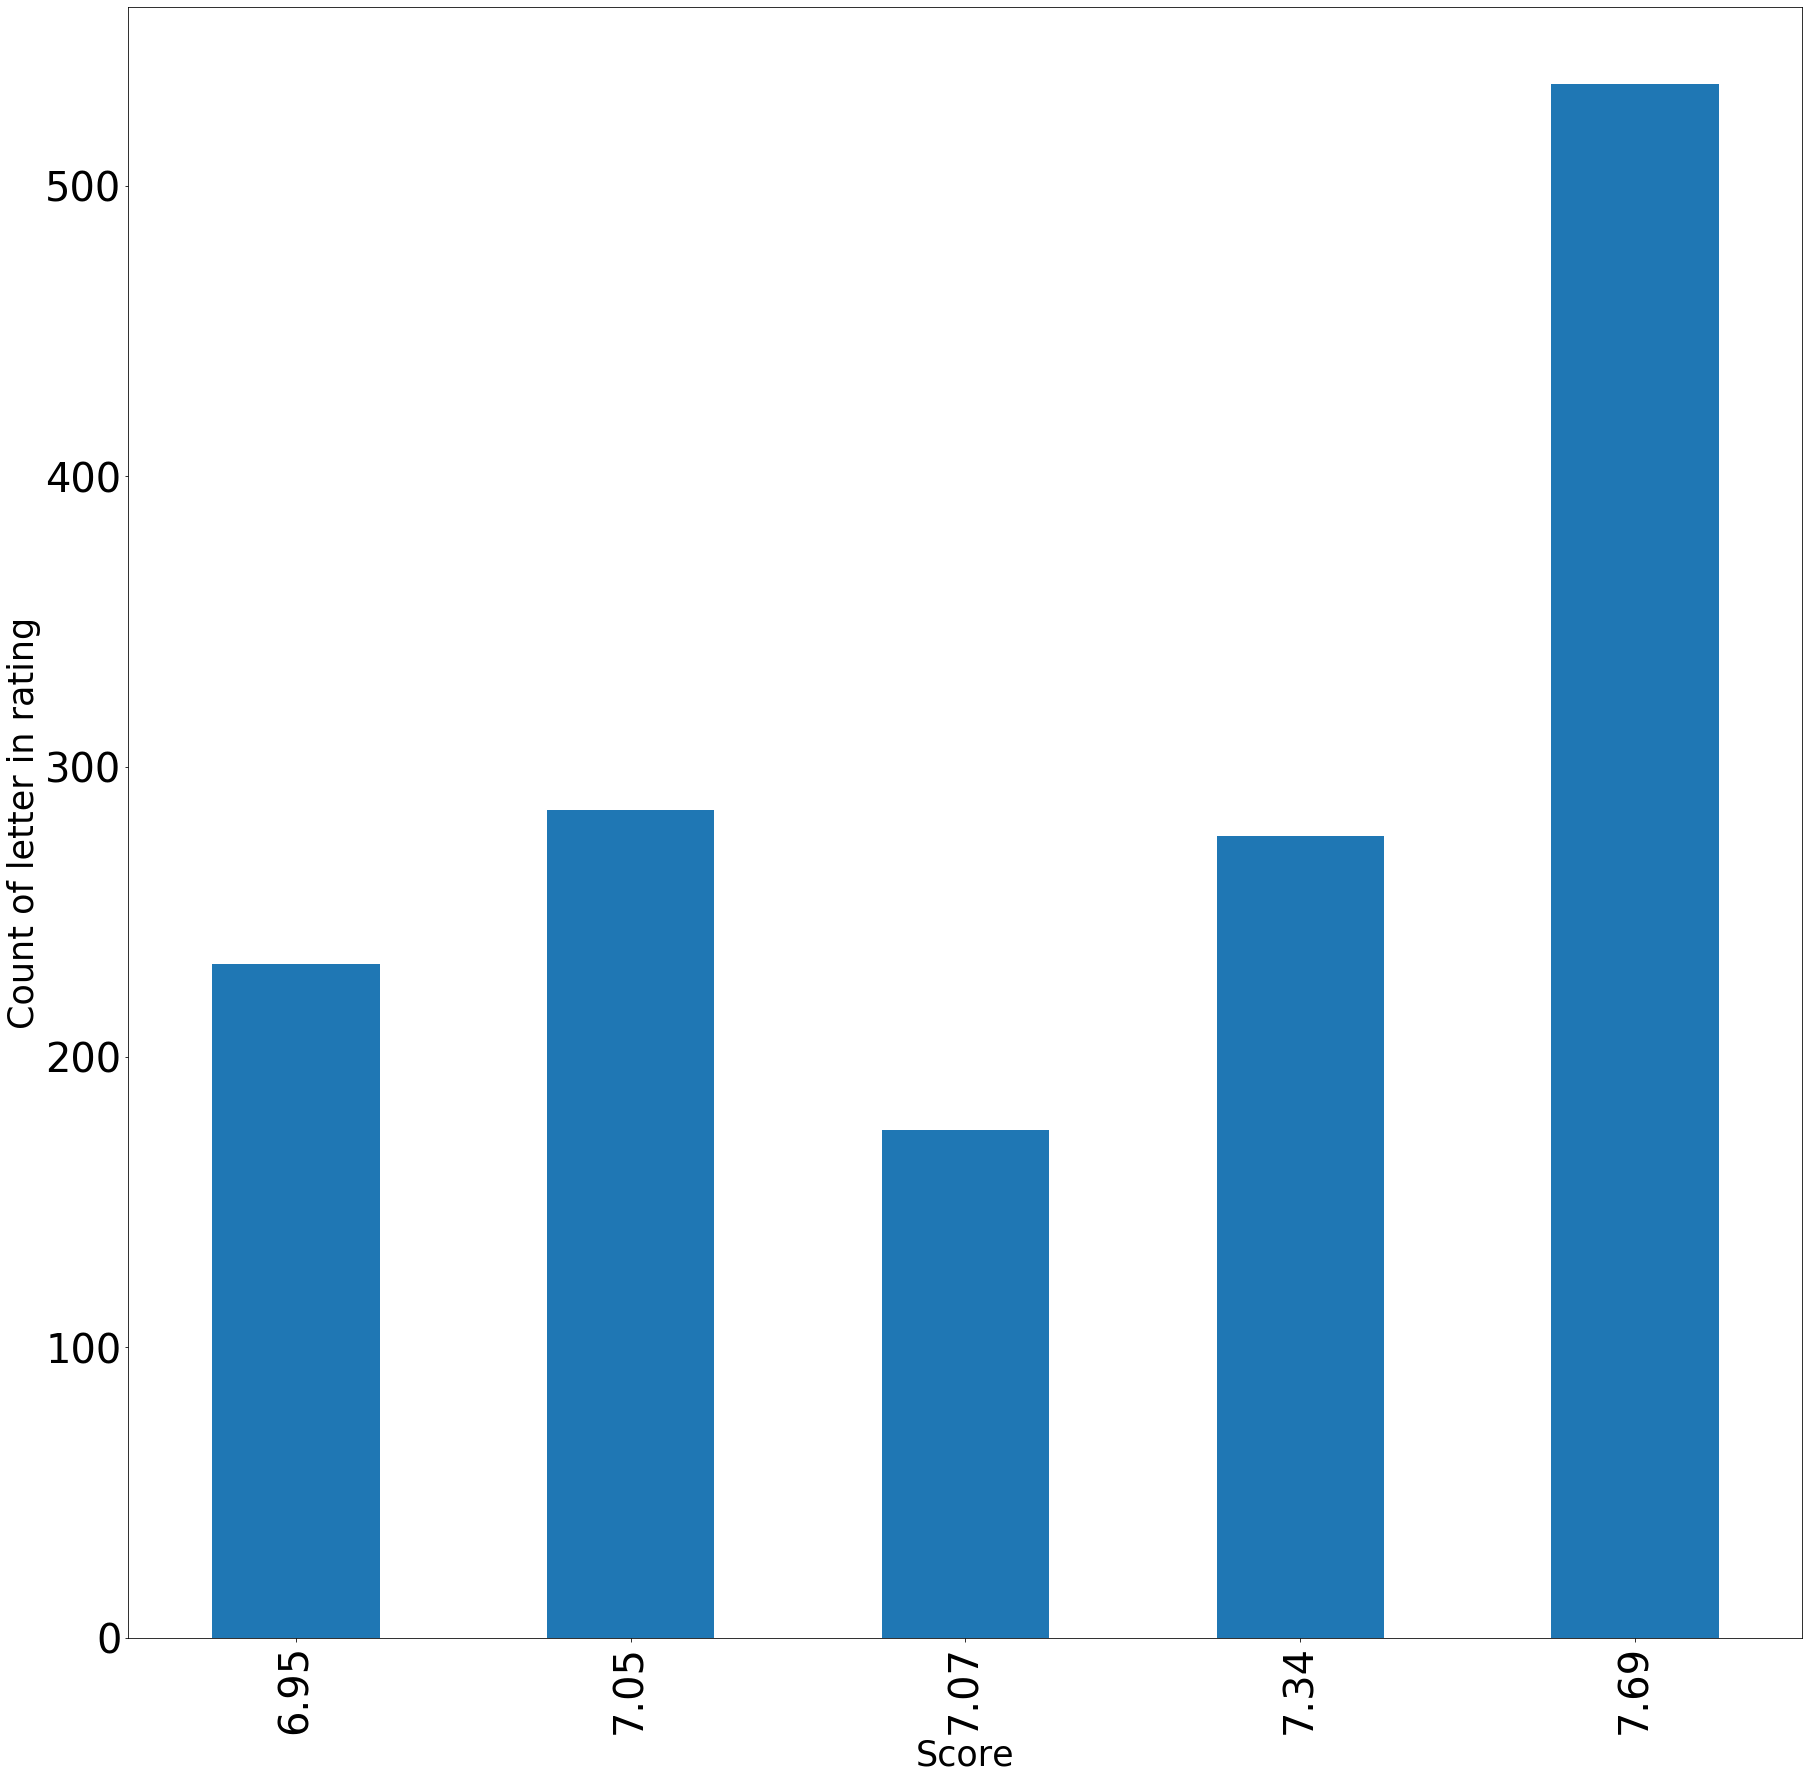

In [54]:
import matplotlib.pyplot as plt

letter_avg=df.groupby('Score')['review_len'].mean().plot(kind='bar',figsize=(30,30))
plt.xlabel('Score',fontsize=35)
plt.ylabel('Count of letter in rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

In [86]:
words = df ['lemmatized']
allwords = []
for wordlist in words:
    allwords +=wordlist

In [87]:
allwords = list(filter(lambda a: a != ',', allwords))
allwords = list(filter(lambda a: a != '.', allwords))
allwords = list(filter(lambda a: a != '”', allwords))
allwords = list(filter(lambda a: a != '“', allwords))

In [90]:
allwords

['nfl',
 'epic',
 'two-minute',
 'long',
 'ad',
 'celebrate',
 'league',
 'upcoming',
 '100th',
 'anniversary',
 'feature',
 'current',
 'former',
 'football',
 'star',
 'play',
 'impromptu',
 'pickup',
 'game',
 'black-tie',
 'gala',
 'barry',
 'sander',
 'deion',
 'sander',
 'tom',
 'brady',
 'franco',
 'harris',
 'mean',
 'joe',
 'greene',
 'man',
 'brother',
 'marshawn',
 'lynch',
 'patrick',
 'mahomes',
 'sam',
 'gordon',
 'utah',
 'girl',
 'tackle',
 'football',
 'league',
 'many',
 'many',
 'amazon',
 'follow',
 '2018',
 'ad',
 'meter-winning',
 'commercial',
 'another',
 'celebrity-filled',
 'spot',
 'star',
 'harrison',
 'ford',
 'forest',
 'whitaker',
 'abbi',
 'jacobson',
 'ilana',
 'glazer',
 'year',
 'ad',
 'go',
 'series',
 'us',
 'alexa',
 'work',
 'microsoft',
 'touch',
 'super',
 'bowl',
 'ad',
 'feature',
 'young',
 'gamers',
 'limited',
 'mobility',
 'commercial',
 'try',
 'new',
 'xbox',
 'adaptive',
 'controller',
 'jason',
 'bateman',
 'star',
 'hyundai',
 'ad',
 

In [88]:
import nltk
from nltk.probability import FreqDist

mostcommon = FreqDist(allwords).most_common(100)

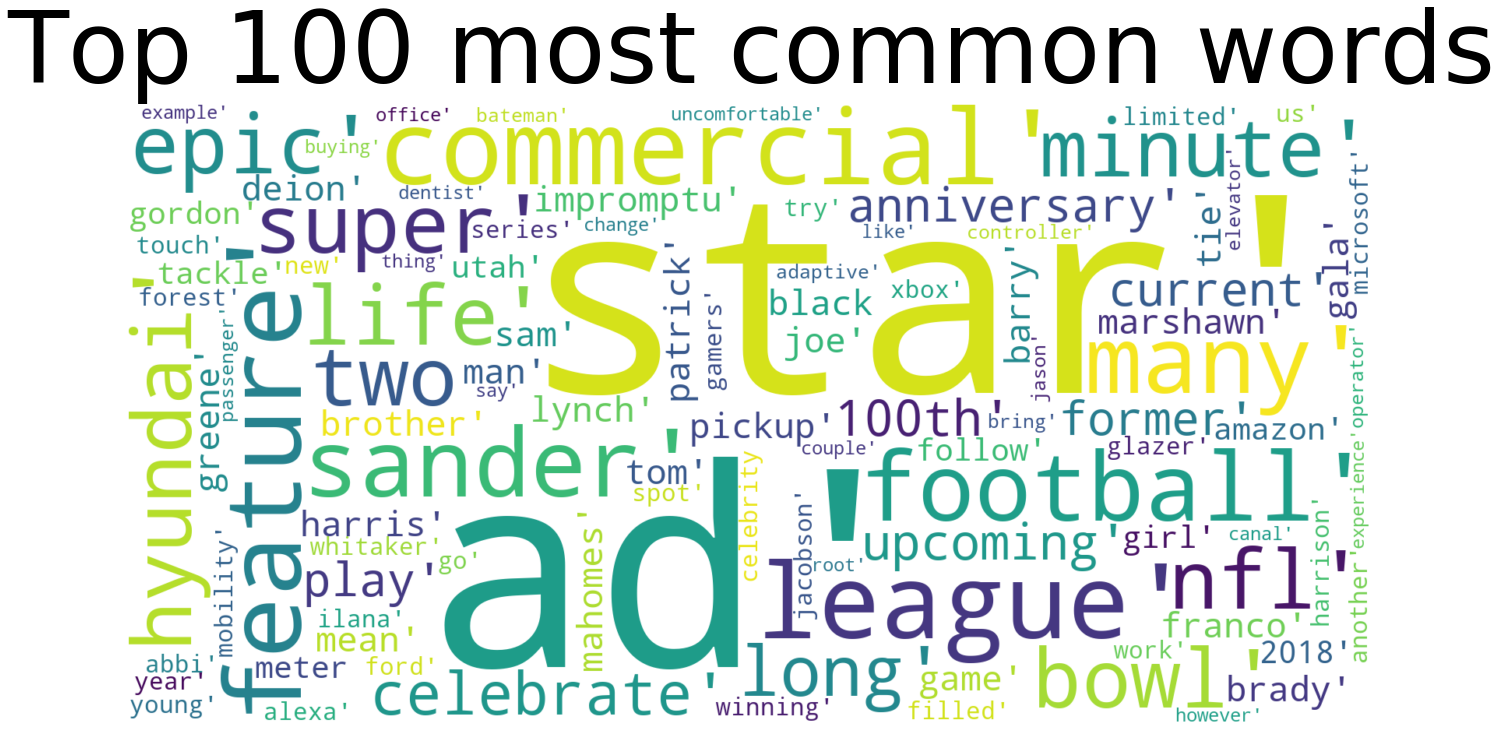

In [89]:
from wordcloud import WordCloud,ImageColorGenerator
wordcloud=WordCloud(width=1600,height=800,background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10),facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 most common words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()

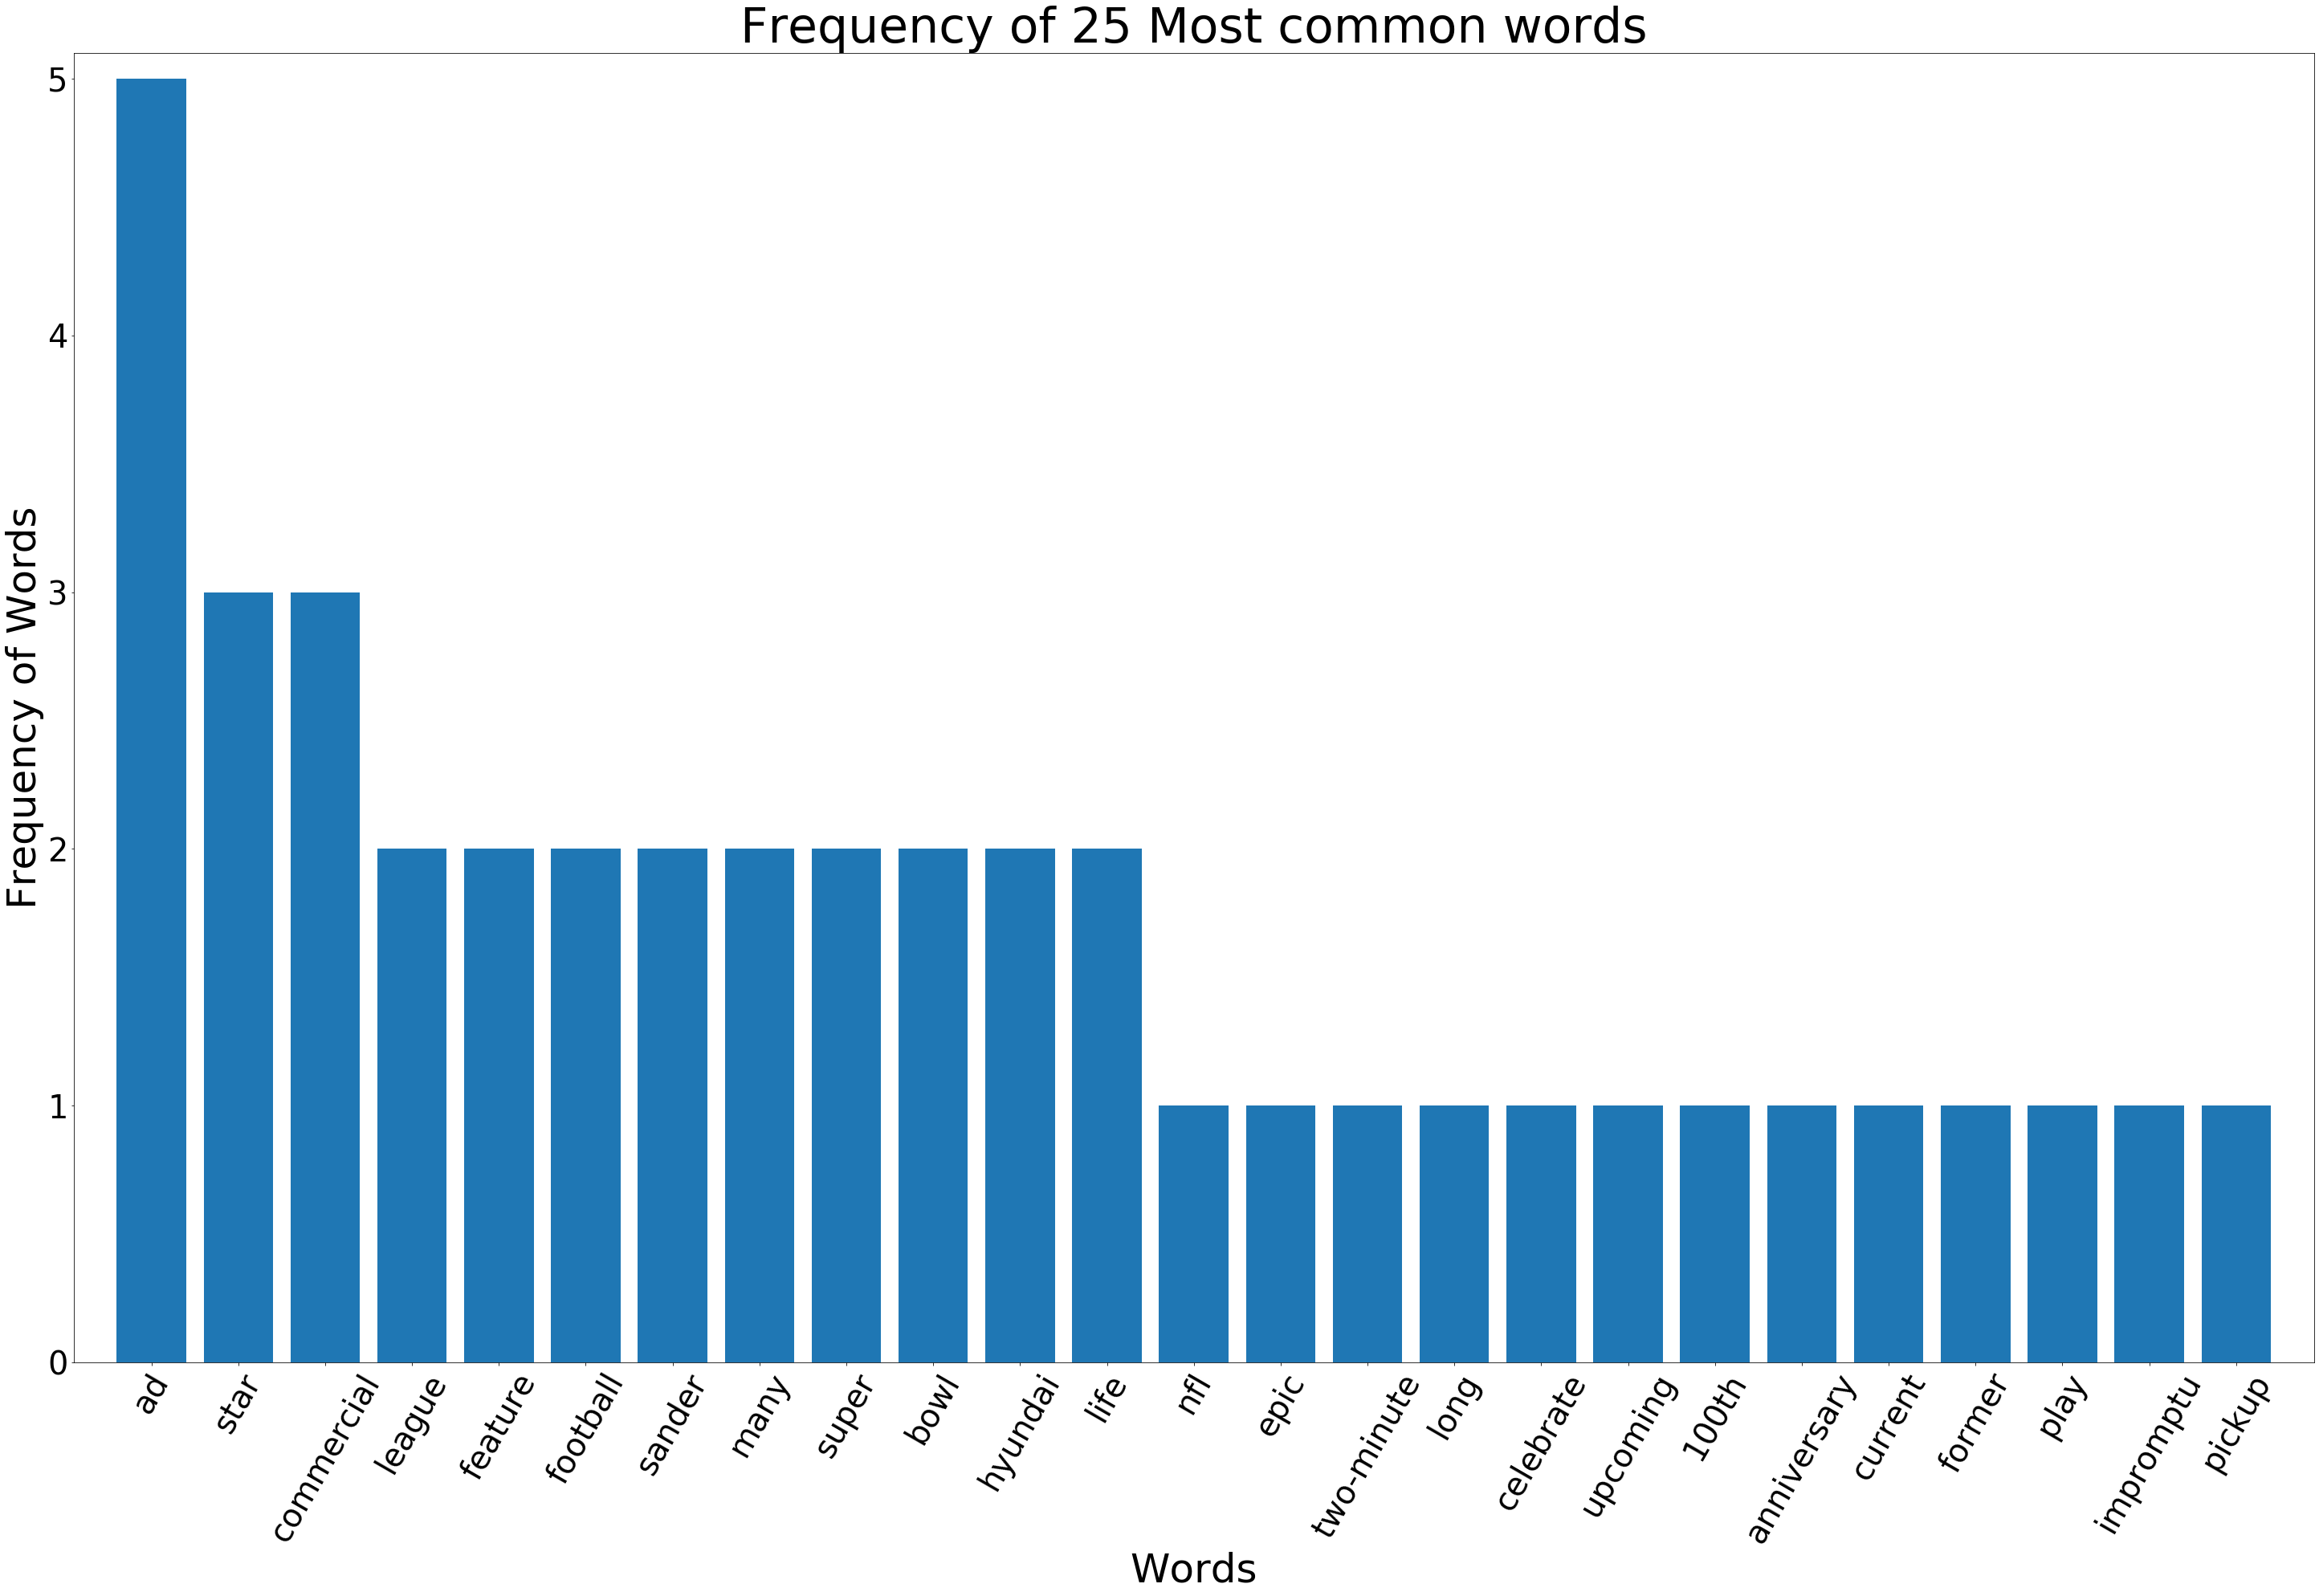

In [93]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x,y)
plt.xlabel('Words',fontsize=50)
plt.ylabel("Frequency of Words",fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60,fontsize=40)
plt.title("Frequency of 25 Most common words", fontsize=60)
plt.show()

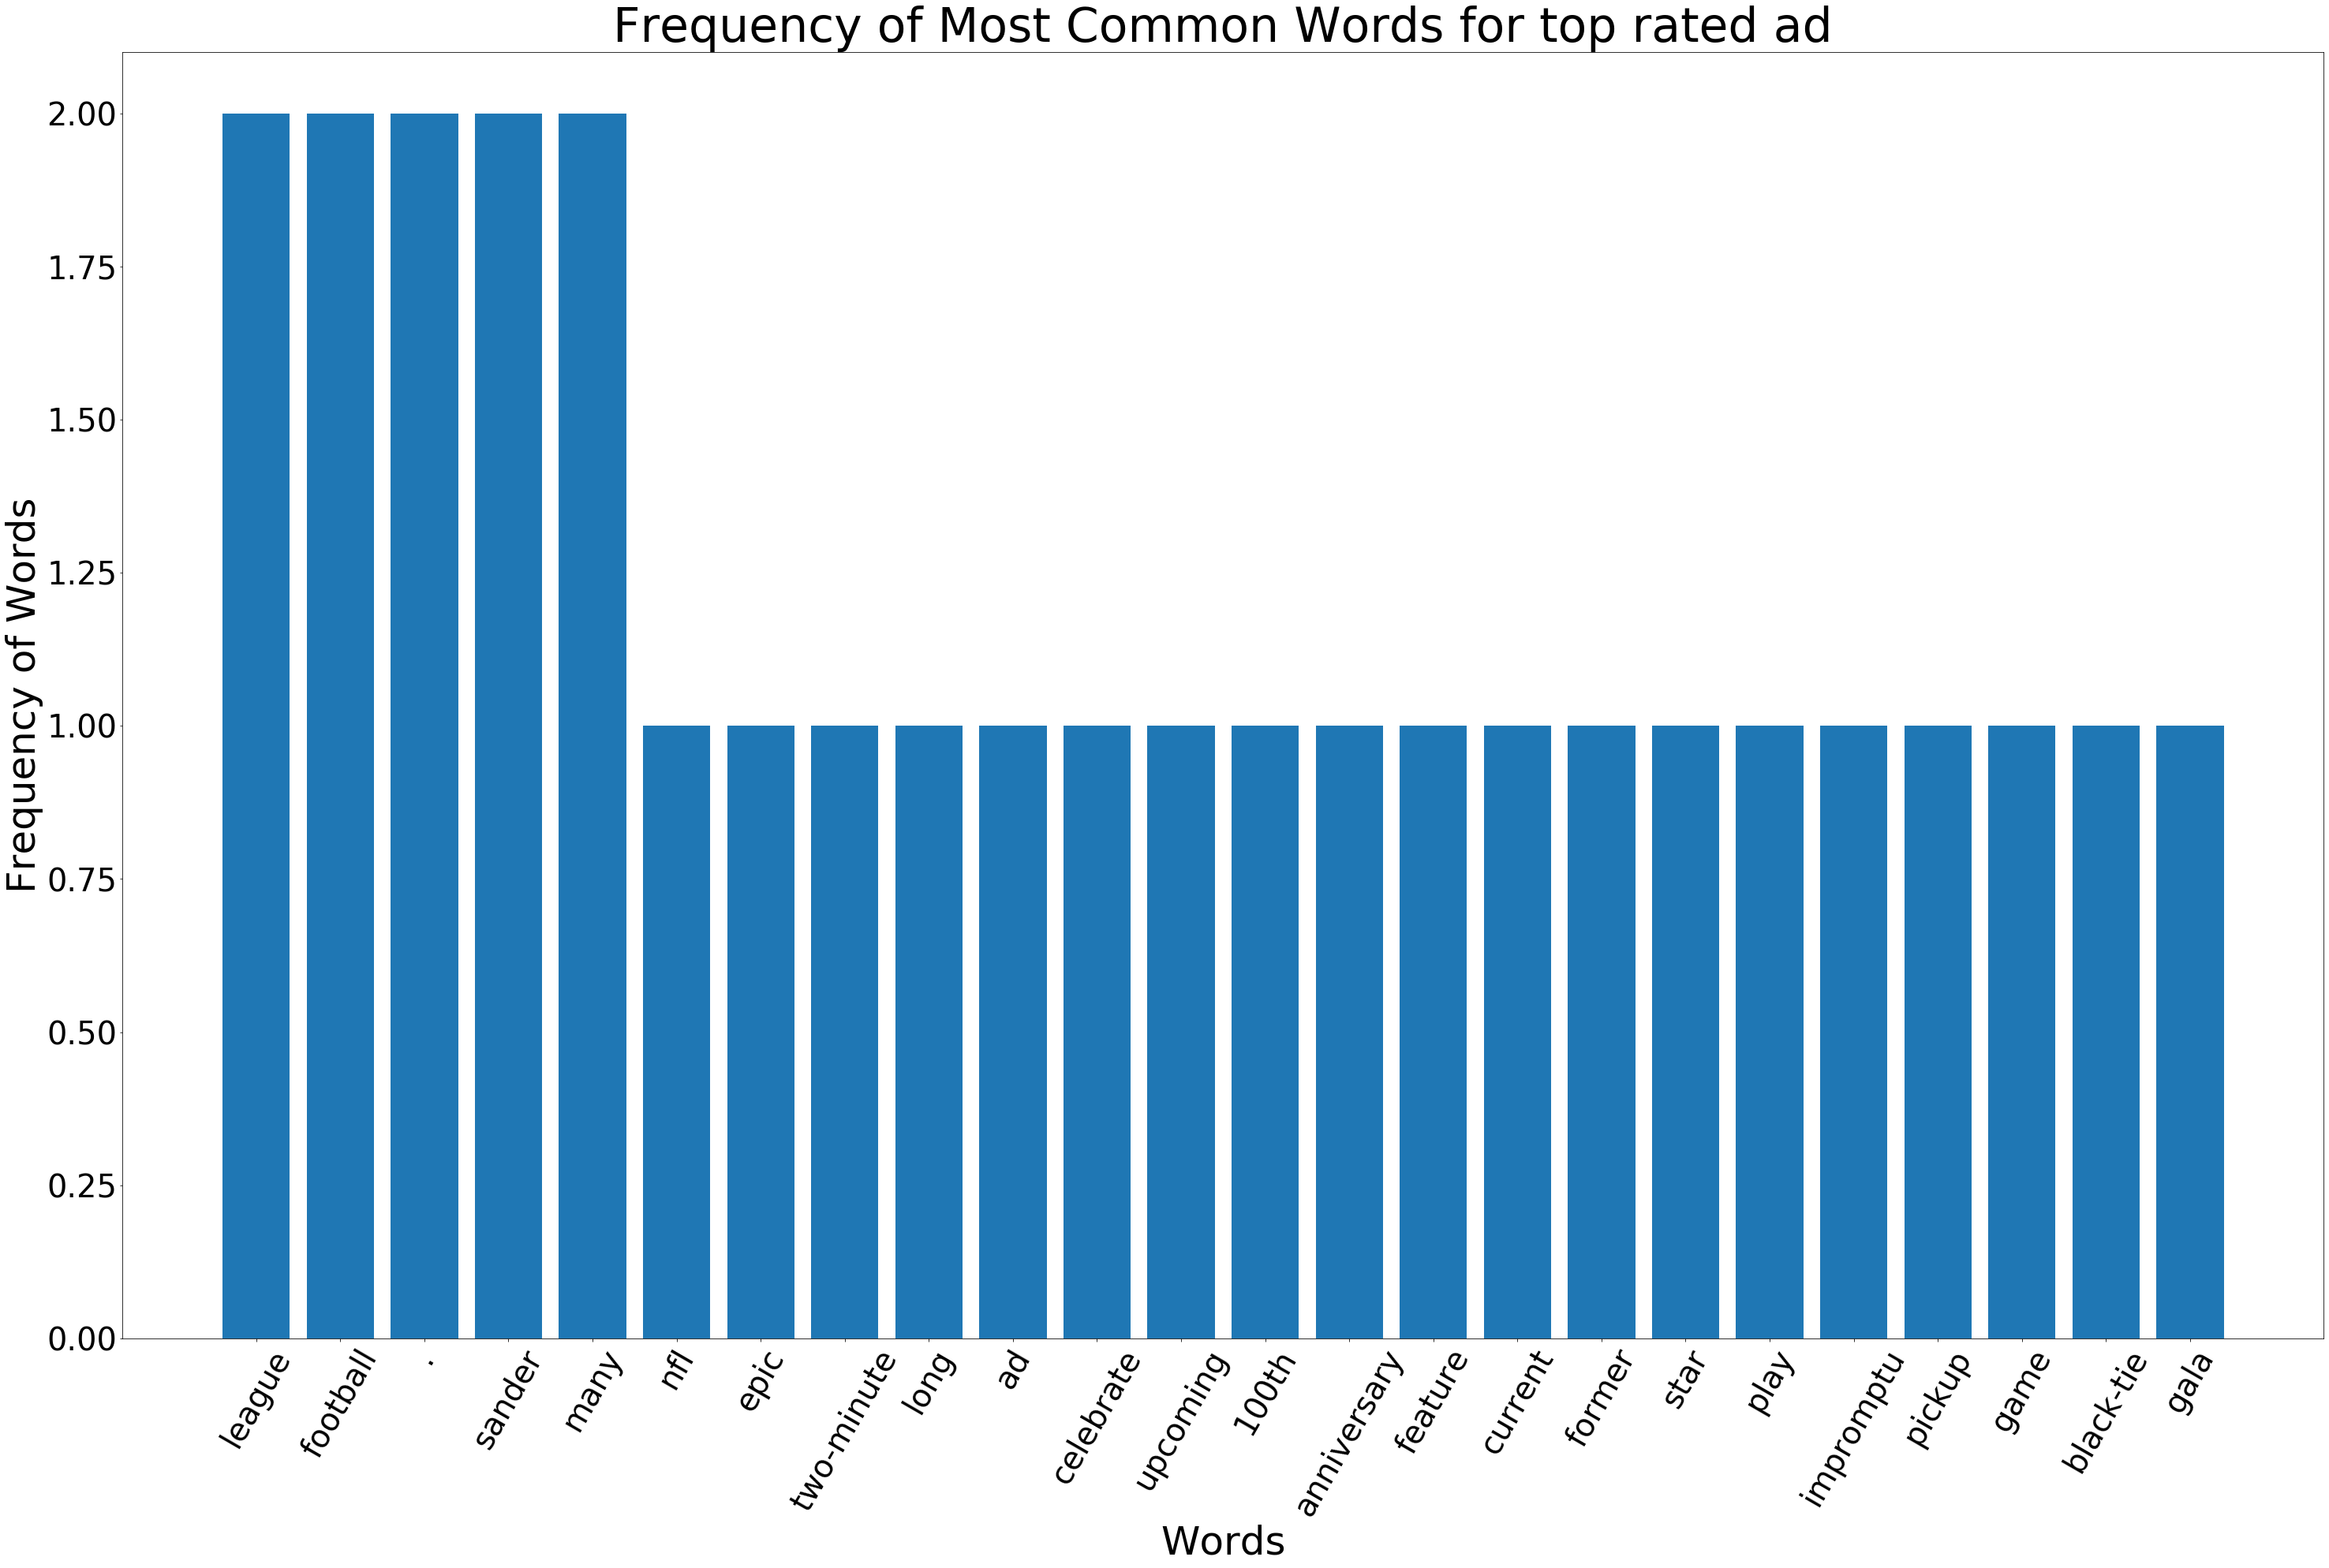

In [102]:
from collections import Counter

group_by = df.groupby('Score')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))

group_by_top=group_by.iloc[4]
group_by_top = group_by_top[1:]
words_top =list(zip(*group_by_top))[0]
freq_top = list(zip(*group_by_top))[1]
plt.figure(figsize=(50,30))
plt.bar(words_top,freq_top)
plt.xlabel('Words',fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60,fontsize=40)
plt.title("Frequency of Most Common Words for top rated ad", fontsize=60)
plt.show()